In [142]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [143]:
# load data file
gdf = gpd.read_file('acs2020_5yr_B02001_14000US53033010800.geojson')

In [144]:
# Visualize top 3 rows of data
gdf.head(3)

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,14000US53033000101,"Census Tract 1.01, King, WA",3659.0,674.0,1717.0,722.0,702.0,345.0,16.0,24.0,...,13.0,103.0,84.0,555.0,279.0,111.0,130.0,444.0,256.0,"MULTIPOLYGON (((-122.29654 47.73197, -122.2965..."
1,14000US53033000102,"Census Tract 1.02, King, WA",4539.0,647.0,3105.0,694.0,305.0,258.0,17.0,27.0,...,13.0,278.0,278.0,146.0,98.0,11.0,19.0,135.0,96.0,"MULTIPOLYGON (((-122.29641 47.72651, -122.2946..."
2,14000US53033000201,"Census Tract 2.01, King, WA",4680.0,671.0,3053.0,536.0,414.0,286.0,0.0,13.0,...,13.0,290.0,260.0,206.0,116.0,85.0,76.0,121.0,88.0,"MULTIPOLYGON (((-122.32358 47.72130, -122.3235..."


In [146]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             182 non-null    object  
 1   name              182 non-null    object  
 2   B02001001         182 non-null    float64 
 3   B02001001, Error  182 non-null    float64 
 4   B02001002         182 non-null    float64 
 5   B02001002, Error  182 non-null    float64 
 6   B02001003         182 non-null    float64 
 7   B02001003, Error  182 non-null    float64 
 8   B02001004         182 non-null    float64 
 9   B02001004, Error  182 non-null    float64 
 10  B02001005         182 non-null    float64 
 11  B02001005, Error  182 non-null    float64 
 12  B02001006         182 non-null    float64 
 13  B02001006, Error  182 non-null    float64 
 14  B02001007         182 non-null    float64 
 15  B02001007, Error  182 non-null    float64 
 16  B02001008         

In [147]:
list(gdf)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

In [148]:
#Dropping last 2 rows that summarize the table and tracts that are in the puget sound (no records)
gdf = gdf.drop([180,181])

In [149]:
columns_to_keep = ['geoid','name','B02001001','B02001002','B02001003','B02001004','B02001005','B02001006','B02001007','B02001008','geometry']

In [150]:
gdf = gdf[columns_to_keep]

In [151]:
gdf.head()

,geoid,name,B02001001,B02001002,B02001003,B02001004,B02001005,B02001006,B02001007,B02001008,geometry
0,14000US53033000101,"Census Tract 1.01, King, WA",3659.0,1717.0,702.0,16.0,566.0,0.0,103.0,555.0,"MULTIPOLYGON (((-122.29654 47.73197, -122.2965..."
1,14000US53033000102,"Census Tract 1.02, King, WA",4539.0,3105.0,305.0,17.0,688.0,0.0,278.0,146.0,"MULTIPOLYGON (((-122.29641 47.72651, -122.2946..."
2,14000US53033000201,"Census Tract 2.01, King, WA",4680.0,3053.0,414.0,0.0,717.0,0.0,290.0,206.0,"MULTIPOLYGON (((-122.32358 47.72130, -122.3235..."
3,14000US53033000202,"Census Tract 2.02, King, WA",4194.0,2735.0,240.0,37.0,711.0,0.0,0.0,471.0,"MULTIPOLYGON (((-122.31005 47.73392, -122.3087..."
4,14000US53033000300,"Census Tract 3, King, WA",2943.0,1992.0,132.0,0.0,537.0,0.0,22.0,260.0,"MULTIPOLYGON (((-122.34521 47.73413, -122.3451..."


In [152]:
gdf.columns = ['geoid',
               'name','Total',
               'White alone',
               'Black or African American alone',
               'American Indian and Alaska Native alone',
               'Asian alone',
               'Native Hawaiian and Other Pacific Islander alone',
               'Some other race alone',
               'Two or more races',
               'geometry']

In [168]:
gdf.sample()

,geoid,nane,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two ormore races alone
127,14000US53033008700,"Census Tract 87, King, WA",4599.0,2367.0,1002.0,15.0,462.0,9.0,93.0,651.0,"MULTIPOLYGON (((-122.31288 47.60268, -122.3128...",51.46771,21.787345,0.326158,10.045662,0.195695,2.022179,14.155251


In [154]:
gdf['Total'].describe()

count     180.000000
mean     4186.894444
std      1195.333260
min      1070.000000
25%      3308.000000
50%      4144.500000
75%      4858.500000
max      7157.000000
Name: Total, dtype: float64

<AxesSubplot:title={'center':'Seattle census tracts by population'}, ylabel='Frequency'>

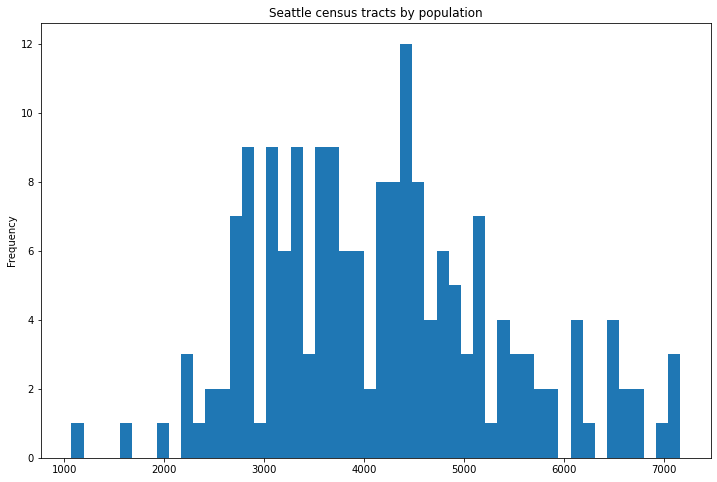

In [169]:
gdf['Total'].plot.hist(figsize=(12,8),
                      bins=50,
                      title='Seattle census tracts by population')

In [171]:
gdf_sorted = gdf.sort_values(by='Asian alone', ascending = False)
gdf_sorted.head()

,geoid,nane,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two ormore races alone
170,14000US53033011700,"Census Tract 117, King, WA",5761.0,1016.0,1353.0,56.0,2831.0,0.0,151.0,354.0,"MULTIPOLYGON (((-122.29611 47.52997, -122.2959...",17.635827,23.485506,0.972053,49.140774,0.000000,2.621073,6.144767
150,14000US53033010402,"Census Tract 104.02, King, WA",4856.0,1334.0,366.0,0.0,2585.0,1.0,292.0,278.0,"MULTIPOLYGON (((-122.31981 47.55213, -122.3195...",27.471170,7.537068,0.000000,53.233114,0.020593,6.013180,5.724876
160,14000US53033011002,"Census Tract 110.02, King, WA",4348.0,437.0,1445.0,0.0,2310.0,0.0,72.0,84.0,"MULTIPOLYGON (((-122.31382 47.54753, -122.3135...",10.050598,33.233671,0.000000,53.127875,0.000000,1.655934,1.931923
98,14000US53033007201,"Census Tract 72.01, King, WA",5318.0,2696.0,150.0,16.0,2178.0,0.0,48.0,230.0,"MULTIPOLYGON (((-122.35136 47.61859, -122.3503...",50.695750,2.820609,0.300865,40.955246,0.000000,0.902595,4.324934
71,14000US53033005306,"Census Tract 53.06, King, WA",3786.0,1144.0,210.0,67.0,2120.0,6.0,42.0,197.0,"MULTIPOLYGON (((-122.31753 47.66145, -122.3174...",30.216587,5.546751,1.769678,55.995774,0.158479,1.109350,5.203381


<AxesSubplot:>

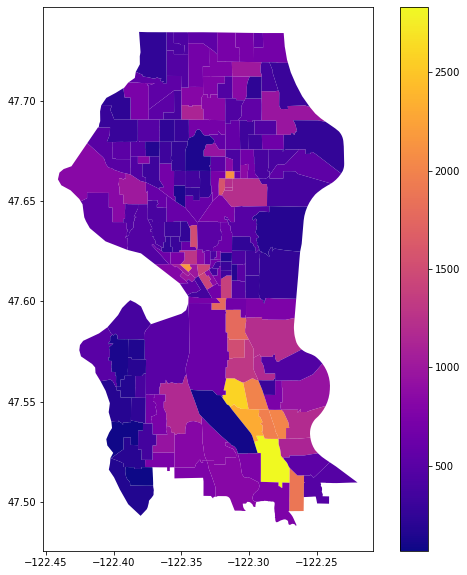

In [175]:
#Visualize the highest population of Asian alone in Seattle

gdf_sorted.plot(figsize=(10,10),
               column='Asian alone',
               cmap='plasma',
               legend=True)

In [186]:
#Normalize data
gdf['Percent White alone'] = gdf['White alone']/gdf['Total']*100
gdf['Percent Black or African American alone'] = gdf['Black or African American alone']/gdf['Total']*100
gdf['Percent American Indian and Alaska Native alone'] = gdf['American Indian and Alaska Native alone']/gdf['Total']*100
gdf['Percent Asian alone'] = gdf['Asian alone']/gdf['Total']*100
gdf['Percent Native Hawaiian and Other Pacific Islander alone'] = gdf['Native Hawaiian and Other Pacific Islander alone']/gdf['Total']*100
gdf['Percent Some other race alone'] = gdf['Some other race alone']/gdf['Total']*100
gdf['Percent Two or more races alone'] = gdf['Two or more races']/gdf['Total']*100

In [187]:
gdf.sample()

,geoid,nane,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,geometry,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two ormore races alone,Percent Two or more races alone
156,14000US53033010702,"Census Tract 107.02, King, WA",4866.0,1800.0,1918.0,1.0,673.0,0.0,123.0,351.0,"MULTIPOLYGON (((-122.37653 47.54104, -122.3764...",36.991369,39.416358,0.020551,13.830662,0.0,2.527744,7.213317,7.213317


<AxesSubplot:>

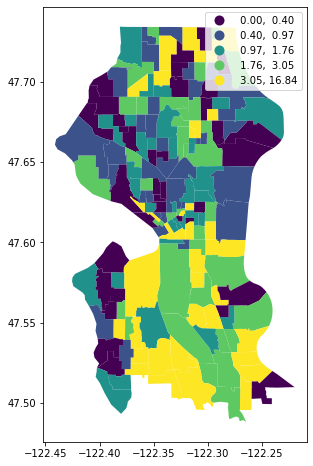

In [203]:
gdf.plot(figsize=(12,8),
        column='Percent Some other race alone',
        legend=True,
        scheme='quantiles')

Text(0.5, 1.0, 'Percent Black or African American alone')

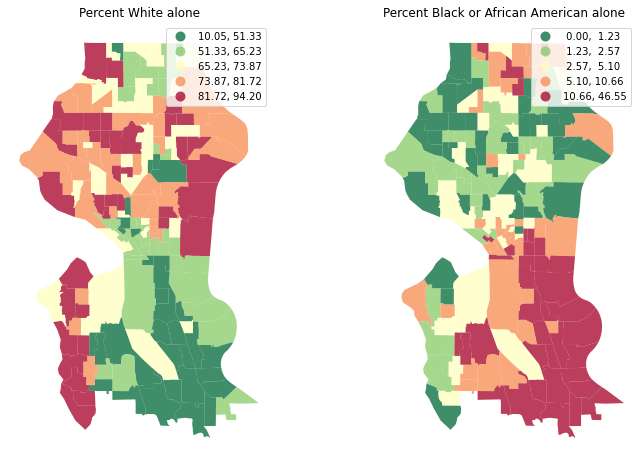

In [192]:
#create 1x2 subplots
fig, axs = plt.subplots(1,2, figsize=(12,8))

#name each subplot
ax1, ax2 = axs

#ploting the map
gdf.plot(column='Percent White alone',
        cmap='RdYlGn_r',
        scheme='quantiles',
        k=5,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        ax=ax1,
        legend=True)

ax1.axis("off")
ax1.set_title('Percent White alone')


gdf.plot(column='Percent Black or African American alone',
        cmap='RdYlGn_r',
        scheme='quantiles',
        k=5,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        ax=ax2,
        legend=True)

ax2.axis("off")
ax2.set_title('Percent Black or African American alone')



Text(0.5, 1.0, 'Percent Asian alone')

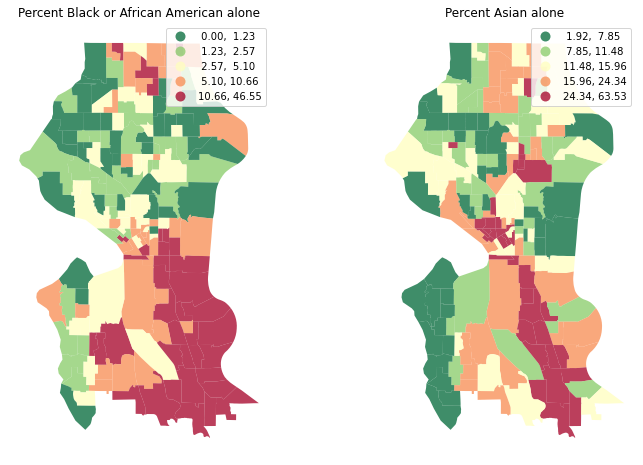

In [201]:
#create 1x2 subplots
fig, axs = plt.subplots(1,2, figsize=(12,8))

#name each subplot
ax1, ax2 = axs

#ploting the map
gdf.plot(column='Percent Black or African American alone',
        cmap='RdYlGn_r',
        scheme='quantiles',
        k=5,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        ax=ax1,
        legend=True)

ax1.axis("off")
ax1.set_title('Percent Black or African American alone')


gdf.plot(column='Percent Asian alone',
        cmap='RdYlGn_r',
        scheme='quantiles',
        k=5,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        ax=ax2,
        legend=True)

ax2.axis("off")
ax2.set_title('Percent Asian alone')
